# Loading DB

In [42]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [43]:
digits = load_digits()

In [44]:
X, y = digits.data, digits.target

In [45]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [46]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
X.shape

(1797, 64)

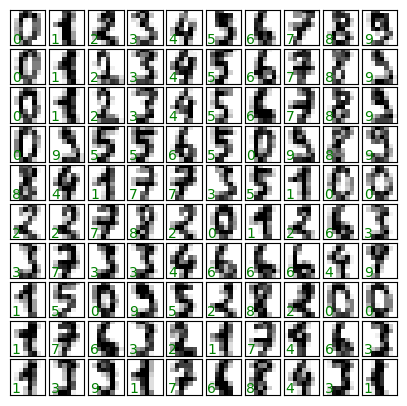

In [48]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

# Import data
 

In [50]:
import json
file_path = 'data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [51]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

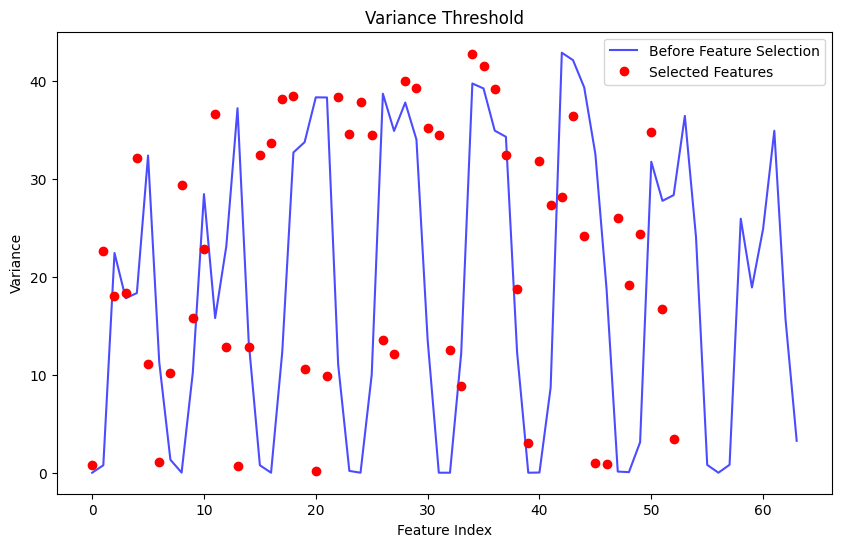

Number of selected features (VarianceThreshold): 53


In [52]:
# Calculate variances of features before feature selection
variances_before = np.var(X_train, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

# Feature Extraction

In [53]:
from sklearn.feature_selection import VarianceThreshold


# Define list of numbers of components for Variance threshold


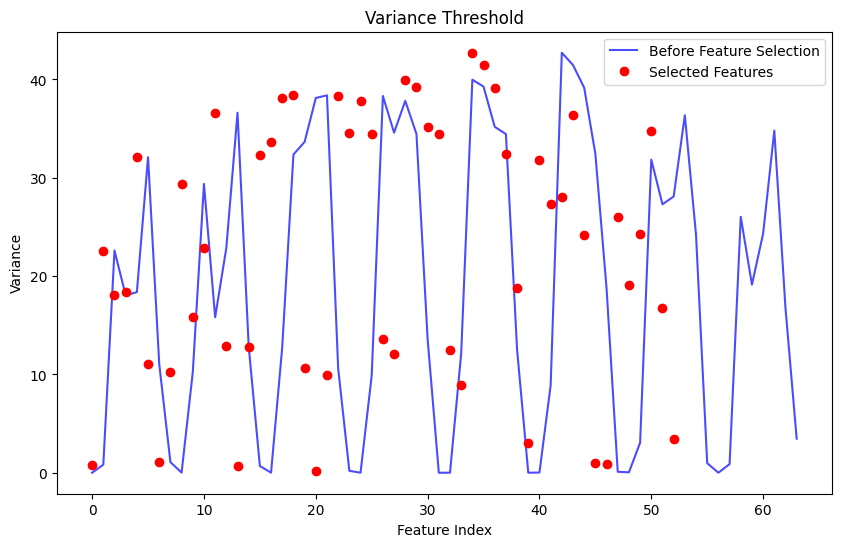

Number of selected features (VarianceThreshold): 53


In [54]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)

# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs = sel.fit_transform(X)

# Calculate variances of features after feature selection
variances_after = np.var(X_fs, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

# Store results


In [73]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

num_components_list = [2, 5, 10, 15, 20, 30]
best_accuracy = 0
worst_accuracy = 100
best_parameters = {}
worst_parameters = {}
kernels = ['linear', 'poly', 'rbf','sigmoid']


# Model


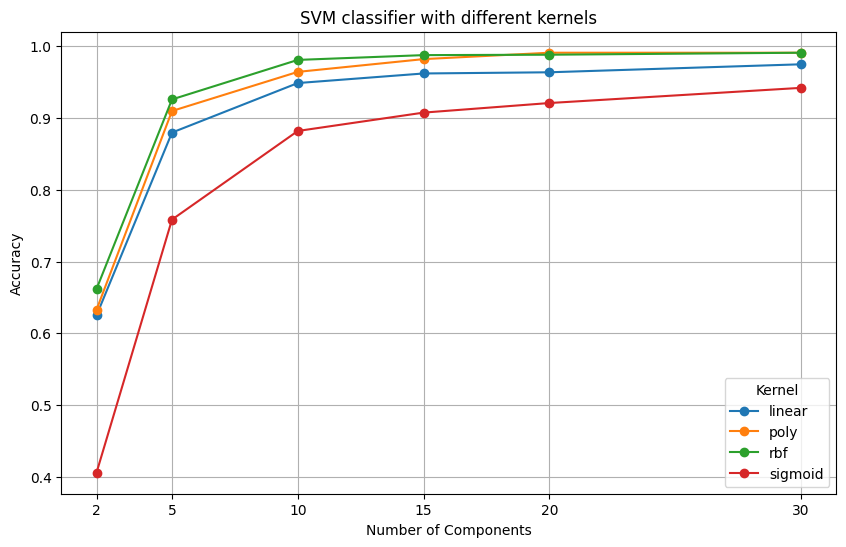

Best results:
Kernel: linear, Number of components: 30, Accuracy: 0.97
Kernel: poly, Number of components: 20, Accuracy: 0.99
Kernel: rbf, Number of components: 30, Accuracy: 0.99
Kernel: sigmoid, Number of components: 30, Accuracy: 0.94

Worst results:
Kernel: linear, Number of components: 2, Accuracy: 0.62
Kernel: poly, Number of components: 2, Accuracy: 0.63
Kernel: rbf, Number of components: 2, Accuracy: 0.66
Kernel: sigmoid, Number of components: 2, Accuracy: 0.41


In [76]:
# Initialize figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Iterate over each kernel
for kernel in kernels:
    accuracies = []
    
    # Train and evaluate models with different numbers of components for PCA
    for num_components in num_components_list:
        # Feature extraction using PCA
        pca = PCA(n_components=num_components)
        X_fe = pca.fit_transform(X_fs)
        
        # Initialize Support Vector Machine classifier with specified kernel
        clf = SVC(kernel=kernel)
        
        # Perform 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X_fe, y, cv=kf)
        accuracy = scores.mean()
        accuracies.append(accuracy)    
        
    # Find the best and worst accuracy and parameters for this kernel
    max_accuracy = max(accuracies)
    min_accuracy = min(accuracies)
    best_index = accuracies.index(max_accuracy)
    worst_index = accuracies.index(min_accuracy)
    best_parameters[kernel] = {
        'num_components': num_components_list[best_index],
        'accuracy': max_accuracy
    }
    worst_parameters[kernel] = {
        'num_components': num_components_list[worst_index],
        'accuracy': min_accuracy
    }

    # Plot results for this kernel
    ax.plot(num_components_list, accuracies, marker='o', linestyle='-', label=kernel)

# Add labels and legend to the plot
plt.title('SVM classifier with different kernels')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(num_components_list)
plt.grid(True)
plt.legend(title='Kernel')
plt.show()

# Print the best and worst results for each kernel
print("Best results:")
for kernel, params in best_parameters.items():
    print(f"Kernel: {kernel}, Number of components: {params['num_components']}, Accuracy: {params['accuracy']:.2f}")

    

print("\nWorst results:")
for kernel, params in worst_parameters.items():
    print(f"Kernel: {kernel}, Number of components: {params['num_components']}, Accuracy: {params['accuracy']:.2f}")
